# Vision Lesson Map

<font color=red>Red </font> highlighted is the topic covered for this lesson
1. <font color=red>Image Processing: OpenCV</font> 
2. AI Model: 
>* K-Nearest Neighbour (kNN) Algorithm
>* Support Vector (SVM)


## Getting Started with OpenCV library

The OpenCV library is designed to help us with computer vision application. We will be using OpenCV extensively throughout this course. Let's get started learning! 

To use OpenCV library, it is necessary to import it as follows:

In [2]:
import cv2 # import OpenCV
from matplotlib import pyplot as plt # import matplotlib
import numpy as np # import numpy

We import numpy as we want to store the pixel values in the numpy array
We import matplotlib to allow us to display our images on the Jupyter notebook itself

## Loading Images and Choosing Color Space

Let's load an image using the imread function of cv2:

In [3]:
from google.colab import drive
drive.mount('/content/Intel_AI4Y')

Drive already mounted at /content/Intel_AI4Y; to attempt to forcibly remount, call drive.mount("/content/Intel_AI4Y", force_remount=True).


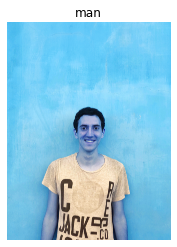

In [4]:
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')   #Load the image file into memory
plt.imshow(img)
plt.title('man')
plt.axis('off')
plt.show()

Great! You've displayed your first picture!

## Task 1: Using the coding block above, open another image file from the 'Images' folder. Label it accordingly!

We will use the man.jpg image for most of this tutorial.

Open the man.jpg image again. Do you notice that the color is not represented properly using this library? Why do you think that is so? 

OpenCV represents the images in BGR as opposed to the RGB we expect. Since it is in the reverse order, you tend to see the blue color in images. We will use the following code for converting from BGR to RGB:

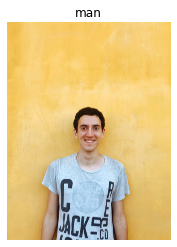

In [5]:
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')   #Load the image file into memory
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('man')
plt.axis('off')
plt.show()

Great job! You have the correct color representation now!Do you recognize now how important it is to find out how colors are read by the different libraries?

Now, let's also read the image as a grayscale image! 

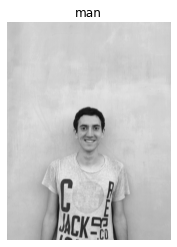

In [6]:
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg',0) # the number zero opens the image as a grayscale image
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.title('man')
plt.axis('off')
plt.show()

Great! You've successfully converted the image into a grayscale image. Do you remember how this image can be represented using numbers? 

## Get information about our images

Now, we want to learn more about our images. First, let us confirm that the image we have is actually represented by a numpy array. To find out, use the help (?) function. 

In [7]:
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')
img?

What is the 'Type' that you saw? Indeed, a ndarray!

Now, let's see what's the size of the image we have:

In [7]:
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')
print(img.shape)
#(3967, 2977, 3) Height, width. 3channels(RGB)

(3967, 2977, 3)


What does the number shown meant? It means that our image has the height of 3967 px and width of 2977 px. How many total number of pixels are there?

What about the number 3? That is the 3 channels, RGB. 

In [8]:
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg',0)
print(img.shape)

(3967, 2977)


Notice what happens when we open the image as grayscale instead? No more 3 channels! 

Now, let's see the minimum and maximum pixel value present in the image:

In [9]:
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')
print (img.min())
print (img.max())

0
255


Just as expected! from 0 to 255

## Accessing pixels

Now, we want to access our pixels and find out what are the RGB value in a particular pixel. 
Use the RGB image to make it easier to recognise the pixels

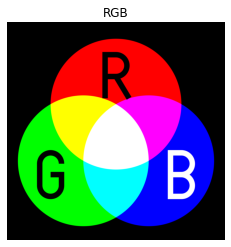

(2000, 2000, 3)
R=255, G=0, B=0


In [10]:
# access the RGB pixel located at x=100, y=100
# OpenCV stores images in BGR order rather than RGB
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/RGB.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('RGB')
plt.show()
print(img.shape)
(B, G, R) = img[500, 500]
print('R={}, G={}, B={}'.format(R, G, B))

Can you find out where's green and blue?

## Splitting color channel

Now, let's see our color channel separately! We'll use the RGB picture first!

Rememeber the subplots activity that we've gone through in acquire - AI for data? We'll use that again here!

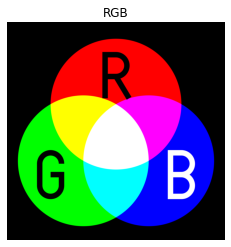

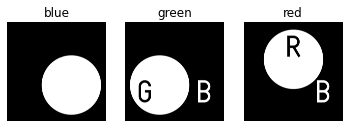

In [11]:
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/RGB.png')   #Load the image file into memory 

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));plt.axis('off');plt.title('RGB')
#Split channel
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]
fig, bgr = plt.subplots(1,3)
bgr[0].imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB));bgr[0].axis('off');bgr[0].set_title('blue'); # Blue
bgr[1].imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB));bgr[1].axis('off');bgr[1].set_title('green'); # Green
bgr[2].imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB));bgr[2].axis('off');bgr[2].set_title('red');   # Red 

plt.show()

## Task 2: Using the coding block above, split the RGB channel of man.jpg. What do you learn about the intensity of the different channels?

## Cropping images

Many times, you will be required to focus on certain area of the image, either to process the image and get rid of non-relevant parts, or to draw a bounding box around a certain area, our 'region of interest(ROI)'. 

Eventually, we will use algorithms to automatically find our ROI, but this time, let's manually extract the ROI!

Let's try cropping our image!

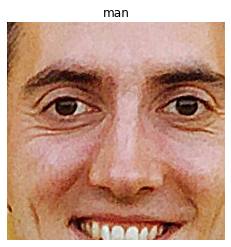

In [21]:
# Exctract a square that focuses on the man's face
# Remember, your current image size is 3967 x 2977
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')
roi = img[1783 : 2183, 1288 : 1688]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('man')
plt.axis('off')
plt.show()

Do you find it difficult to guess for the numbers? You can turn on the axis to make it easier for you to find the ROI (Region of Interest). In experience stage, we will use OpenCV function to automatically find out the ROI!

Change out the numbers above! What does it tell you about the way that the coordinate system in OpenCV is arranged? Where do you think is the (0,0) point?

## Changing pixel value

Now that you can access the numpy array, you can also change the pixel value! Let's see how we can 'blank out' the man's face from the photo

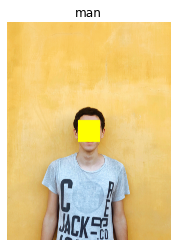

In [23]:
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')
img[1783 : 2183, 1288 : 1688] = [0,255,255] 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('man')
plt.axis('off')
plt.show()

Cool, isn't it!

## Task 3: Using the coding block above, change the box color into your favourite color!

Now, let's learn how to copy a part of the image and place it somewhere else

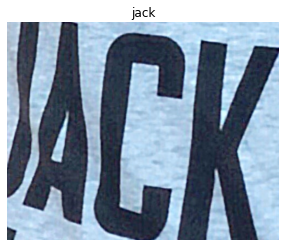

In [25]:
# Exctract a part of the image that focuses on the word 'JACK'
# Remember, your current image size is 3967 x 2977
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')
jack = img[3500:3900, 1000:1500]
plt.imshow(cv2.cvtColor(jack, cv2.COLOR_BGR2RGB))
plt.title('jack')
plt.axis('off')
plt.show()

Now, we will copy 'JACK' somewhere else

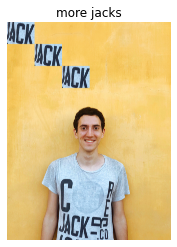

In [26]:
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')
jack = img[3500:3900, 1000:1500]
img[0:400,0:500]=img[400:800,500:1000]=img[800:1200,1000:1500]=jack

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('more jacks')
plt.axis('off')
plt.show()

## Task 4: Using the coding block above, copy another one thing (it's up to you!)

## Resizing images

Resizing images is important, especially when we want to train our model. When training a model, we want all our images to have the same size and aspect ratio. 

Now, let's try resizing our image!

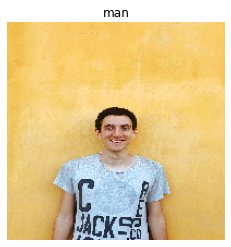

(200, 200, 3)


In [27]:
# resize the image to 200x200px, ignoring aspect ratio
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')
resized = cv2.resize(img, (200, 200))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('man')
plt.axis('off')
plt.show()
print(resized.shape)

Ouch! The image is resized, but it is definitely distorted. Not good for our training purposes!

## Resizing images, maintain aspect ratio

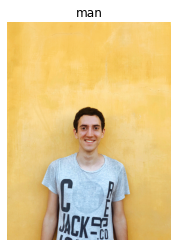

(991, 744, 3)


In [29]:
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
# Remember, your current image size is 3967 x 2977
img = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg')
resized=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('man')
plt.axis('off')
plt.show()
print(resized.shape)

Great job resizing the image while maintaining the aspect ratio. What do you think of the size of the file if we save it now?

## Saving images
We can save our image using the imwrite function

In [30]:
cv2.imwrite('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg',img)
cv2.imwrite('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/man.jpg',resized)

True

Take a look at your folder. Do you see the new file? Compare the size

## Task 5: Resize the image again and make it even smaller!

## Batch processing images

We often will process numerous images at one time, to prepare them for further processing. How can we do so? We can use the loop function to loop over our images and process them one by one. 

In [31]:
import cv2
import glob #for matching datatypes. Learn more: https://pymotw.com/2/glob/
import os

#change directory to your image directory
path = r'/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images' #os.getcwd() leads you to your current directory
os.chdir(path)
    
# Create a list of files that has the extension JPG
images = glob.glob('*.jpg')

#Create a folder called resized 
folder = 'resized'
if not os.path.exists(folder):
    os.makedirs(folder)

#Loop through the images
for image in images:
    #read images path (0 for grayscale, 1 for color)
    img=cv2.imread(image,0)
    
    #Create a variable to store the resized image 
    #shape[0] = width, shape[1] = height
    re=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
    
    #Check out that images in re has been resized
    #cv2.imshow('Checking...',re)
    
    #Show result image for 0,5 sec on screen
    #cv2.waitKey(500)
    #cv2.destroyAllWindows()
    
    #Write resized file
    cv2.imwrite(folder + '/' + 'resized_'+image, re)

#change directory to your working directory
path = r'/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/'
os.chdir(path)

Check your folder! Do you see your new photos?

Great job! You have learnt the basics of OpenCV

We'll use more OpenCV throughout the experience stage! Stay tuned! 

# <font color=red>Exercises</font> 

### 1. Open flower.jpg and display it on the Jupyter notebook

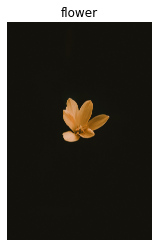

In [73]:
img2 = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/flower.jpg')   #Load the image file into memory
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('flower')
plt.axis('off')
plt.show()

### 2. What is the size of the image?

In [74]:
print(img2.shape)

(5655, 3770, 3)


### 3. Crop the flower into a square

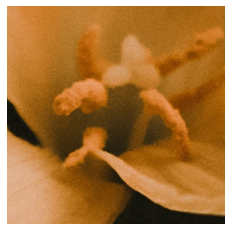

In [75]:
flower_square = img2[2627 : 3027, 1685 :2085]
plt.imshow(cv2.cvtColor(flower_square, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### 4. Copy the flower into the image (at least 3 flowers)

(5655, 3770, 3)


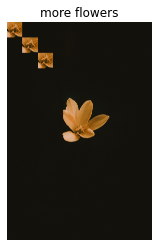

In [86]:
img3 = cv2.imread('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/flower.jpg') 
print(img3.shape)

flower_square_zoomed = img3[2627 : 3027, 1685 :2085]

img3[0:400,0:400]=img3[400:800,400:800]=img3[800:1200,800:1200] = flower_square_zoomed

plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('more flowers')
plt.axis('off')
plt.show()

### 5. Resize at least one of the flowers

(200, 200, 3)


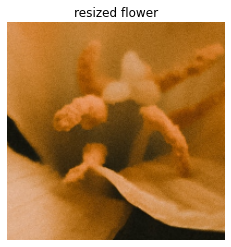

In [93]:
one_flower_to_resize = img3[0:400,0:400] # One of the flower images

# create a resized flower variable
resized_flower = cv2.resize(one_flower_to_resize, (200, 200))

# PLot it out
plt.imshow(cv2.cvtColor(resized_flower, cv2.COLOR_BGR2RGB))
plt.title('resized flower')
plt.axis('off')
print(resized_flower.shape)

### 6. Save your new image!

In [94]:
cv2.imwrite('/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images/flower.jpg',resized_flower)

True

### 7. Perform a batch processing to crop the images in the folder 'Images' to squares of the same size, with file size of max 40KB!

In [113]:
import cv2
import glob #for matching datatypes. Learn more: https://pymotw.com/2/glob/
import os

#change directory to your image directory
path = r'/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/Images' #os.getcwd() leads you to your current directory
os.chdir(path)
    
# Create a list of files that has the extension JPG
images = glob.glob('*.jpg')

#Create a folder called resized 
folder = 'resized_square_images'
if not os.path.exists(folder):
    os.makedirs(folder)

#Loop through the images
for image in images:
    #read images path (0 for grayscale, 1 for color)
    img=cv2.imread(image,0)

    #Create a variable to store the resized image 
    #shape[0] = width, shape[1] = height
    re=cv2.resize(img, (200, 200))
    
    #Check out that images in re has been resized
    #cv2.imshow('Checking...',re)
    
    #Show result image for 0,5 sec on screen
    #cv2.waitKey(500)
    #cv2.destroyAllWindows()
    
    #Write resized file
    cv2.imwrite(folder + '/' + 'resized_'+image, re)

#change directory to your working directory
path = r'/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_14/'
os.chdir(path)

What do you notice? Do you see that some of the images are cut such that we lose the information that we want? How might we use the computer to help us determine our area of interest?

We will discover that more at the next notebook! 